### Classificação Multiclasse - KNN

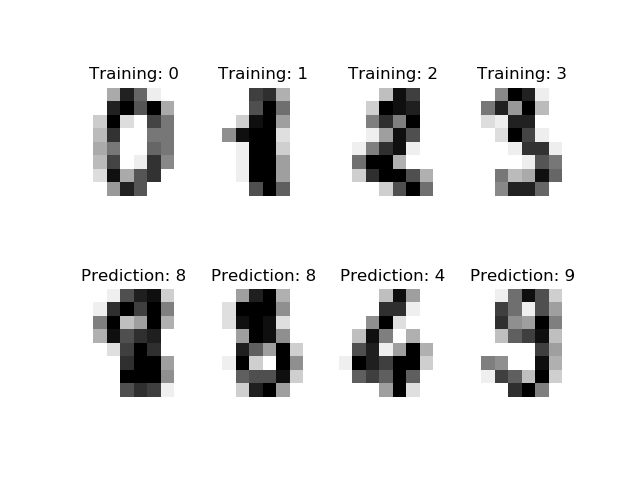

In [1]:
# Objetivo: Prever uma entre 10 saídas possíveis para cada registro (dígitos de 0 a 10).
# Fonte dos dados: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
from IPython.display import Image
Image('imagens/digitos.png')

In [2]:
# Carrega os pacotes
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carregando o dataset
digitos = datasets.load_digits()

In [4]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

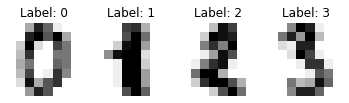

In [5]:
# Visualizando algumas imagens e labels
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [6]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [7]:
# Formato de X e Y
print(X.shape, Y.shape)

(1797, 64) (1797,)


## Pré-Processamento

In [9]:
# Divisão em dados de treino e de teste
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [10]:
# Divisão dos dados de treino em dados de treino e dados de validação
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, 
                                                                    Y_treino, 
                                                                    test_size = 0.1, 
                                                                    random_state = 84)

In [11]:
# Imprimindo o número de exemplos (observações) em cada dataset
print("Exemplos de Treino: {}".format(len(treinoLabels)))
print("Exemplos de Validação: {}".format(len(validLabels)))
print("Exemplos de Teste: {}".format(len(testeLabels)))

Exemplos de Treino: 1131
Exemplos de Validação: 126
Exemplos de Teste: 540


In [12]:
# Normalização dos dados pela Média

# Cálculo da média do dataset de treino
X_norm = np.mean(X, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = testeData - X_norm

In [13]:
# Shape dos datasets
print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(1131, 64) (126, 64) (540, 64)


## Testando o Melhor Valor de K

In [14]:
# Range de valores de k que iremos testar
kVals = range(1, 30, 2)

In [15]:
# Lista vazia para receber as acurácias
acuracias = []

In [16]:
# Loop em todos os valores de k para testar cada um deles
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(treinoData, treinoLabels)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(validData, validLabels)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

Com valor de k = 1, a acurácia é = 99.21%
Com valor de k = 3, a acurácia é = 100.00%
Com valor de k = 5, a acurácia é = 100.00%
Com valor de k = 7, a acurácia é = 99.21%
Com valor de k = 9, a acurácia é = 98.41%
Com valor de k = 11, a acurácia é = 98.41%
Com valor de k = 13, a acurácia é = 97.62%
Com valor de k = 15, a acurácia é = 97.62%
Com valor de k = 17, a acurácia é = 97.62%
Com valor de k = 19, a acurácia é = 97.62%
Com valor de k = 21, a acurácia é = 97.62%
Com valor de k = 23, a acurácia é = 97.62%
Com valor de k = 25, a acurácia é = 96.83%
Com valor de k = 27, a acurácia é = 96.83%
Com valor de k = 29, a acurácia é = 96.83%


In [17]:
# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 3 alcançou a mais alta acurácia de 100.00% nos dados de validação!


### Construção e Treinamento do Modelo KNN

In [18]:
# Criando a versão final do modelo com o maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])

In [19]:
# Treinamento do modelo
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Previsões com Dados de Teste e Avaliação do Modelo

In [20]:
# Previsões com os dados de teste
predictions = modeloFinal.predict(testeData)

In [21]:
# Performande do modelo nos dados de teste
print("Avaliação do Modelo nos Dados de Teste")
print(classification_report(testeLabels, predictions))

Avaliação do Modelo nos Dados de Teste
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      1.00      0.99        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.98      1.00      0.99        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [22]:
# Confusion Matrix do Modelo Final
print ("Confusion matrix")
print(confusion_matrix(testeLabels, predictions))

Confusion matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


Valor Previsto: 5


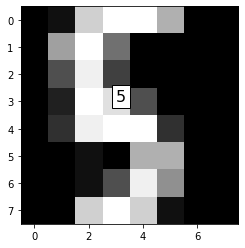

Valor Previsto: 4


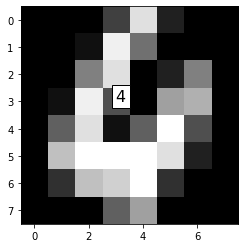

Valor Previsto: 3


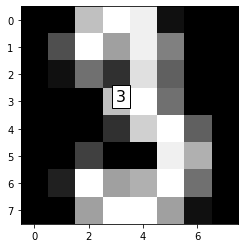

Valor Previsto: 2


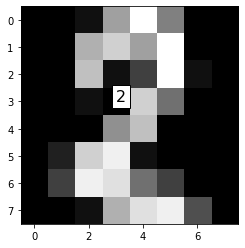

Valor Previsto: 2


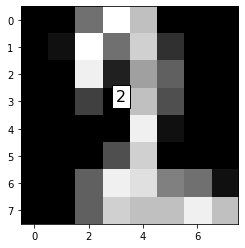

In [23]:
# Fazendo previsões com o modelo treinado usando dados de teste
for i in np.random.randint(0, high=len(testeLabels), size=(5,)):
         
    # Obtém uma imagem e faz a previsão
    image = testeData[i]
    prediction = modeloFinal.predict([image])[0]
         
    # Mostra as previsões
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("Valor Previsto: {}".format(prediction))
    plt.show()

## Previsões em Novos Dados com o Modelo Treinado

In [24]:
# Definindo um novo dígito (dados de entrada)
novoDigito = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [25]:
# Normalizando o novo dígito
novoDigito_norm = novoDigito - X_norm

In [26]:
# Fazendo a previsão com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Valor Previsto: [6]


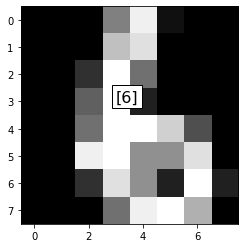

In [27]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Valor Previsto: {}".format(novaPrevisao))
plt.show()

In [28]:
# Definindo um novo dígito (dados de entrada)
novoDigito = [0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]

In [29]:
# Normalizando o novo dígito
novoDigito_norm = novoDigito - X_norm

In [30]:
# Fazendo a previsão com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Valor Previsto: [1]


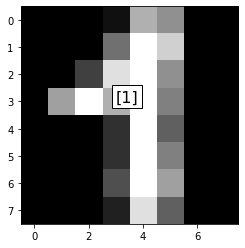

In [31]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Valor Previsto: {}".format(novaPrevisao))
plt.show()